In [54]:
import matplotlib.pyplot as plt
import pandas

In [46]:
data = pandas.read_table('1335.vdb.tab', sep = '\t', header = 0)
data = data.sort_values(by = ['OTUConTaxonomy'])
data = data.reset_index(drop=True)

list_taxon=['Domaine','Embranchement','Classe','Ordre',"Famille","Genre"]
for i in range(6):
    colname = list_taxon[i]
    data[colname]=data.apply(lambda row:row.OTUConTaxonomy.split(";")[i].split("(")[0],axis=1)
    
data['OTU'] = data.apply(lambda row:row.OTUNumber.replace('Otu',''), axis=1)
data = data.drop(columns=['OTUConTaxonomy','OTUNumber'])
data.columns=['Door1','Door2','FaucetHandle1','FaucetHandle2','SinkFloor1','SinkFloor2','Soap Dispenser','Stall','ToiletFloor1','ToiletFloor2','ToiletFlushHandle1','ToiletFlushHandle2','ToiletSeat1','ToiletSeat2','Domaine','Embranchement','Classe','Ordre','Famille','Genre','OTU']
data

,Door1,Door2,FaucetHandle1,FaucetHandle2,SinkFloor1,SinkFloor2,Soap Dispenser,Stall,ToiletFloor1,ToiletFloor2,...,ToiletFlushHandle2,ToiletSeat1,ToiletSeat2,Domaine,Embranchement,Classe,Ordre,Famille,Genre,OTU
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp1,Gp1,unclassified,unclassified,01745
1,0,0,0,0,3,0,0,0,0,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp1,Gp1,unclassified,unclassified,01118
2,0,0,0,0,3,4,0,0,9,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp16,Gp16,unclassified,unclassified,00220
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp16,Gp16,unclassified,unclassified,02978
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Bacteria,Acidobacteria,Acidobacteria_Gp16,Gp16,unclassified,unclassified,02405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,03538
4101,0,0,0,0,1,0,0,0,0,0,...,0,0,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,03529
4102,0,0,0,0,0,0,0,0,0,1,...,0,0,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,00726
4103,0,0,0,0,0,1,0,0,2,0,...,0,3,0,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,00601


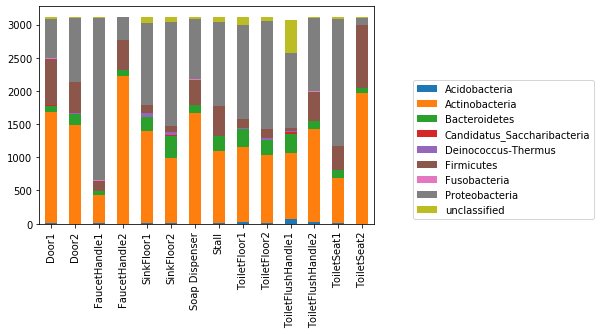

In [121]:
#EMB = data.groupby(by=['Embranchement']).sum()

AMB = pandas.pivot_table(data,columns = 'Embranchement',aggfunc='sum')
vec = AMB.apply(lambda col:col.sum()>=50, axis=0)


AMB=AMB.loc[:,vec]

ax = AMB.plot(kind="bar",stacked=True)
ax.legend(loc='lower left',fontsize=10, bbox_to_anchor=(1.1,0))